# Header

Fitting logistic regression model to the nano dataset.

In [111]:
# Import necessary libraries
import sys
import os
import glob

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
import matplotlib.ticker as mticker
import matplotlib.colors as colors # for norm=colors.CenteredNorm() in imshow

import plotnine as p9

from PIL import Image
from IPython.display import HTML
from IPython.display import Image as IPImage
from IPython.display import display

# Data

The input (training) data $x^{[0]}$ comprises 24 3x3 pixel images grouped into two classes: vertical and horizontal lines. Each pixel assumes a grayscale value between 0 and 1.

The data is stored in a CSV file `data/lines_3x3_train.csv` ([link](https://github.com/dmattek/tutorial-classify-nano/blob/db2c58c1ef7ae907c96342e39f40ca9e27ce8cbd/data/lines_3x3_train.csv)), where each row contains pixel intensities of a single image.
The last column determines the class of the image: 0 for vertical, 1 for horizontal lines.

In [112]:
# Load training data
if IN_COLAB:
    dt_train = pd.read_csv(url_input)
else:
    dt_train = pd.read_csv("../data/lines_3x3_train.csv")

dt_train.head()

,1_1,1_2,1_3,2_1,2_2,2_3,3_1,3_2,3_3,class
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
3,1.0,0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.8,0.9,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0


Now, we need to construct input and output matrices from the pandas data.

In [113]:
# Assign input and output matrices

# Input: 24 training images 3x3 = 9x24
x0 = dt_train.to_numpy()[:,0:9].T

# Output: class annotations: vector with 24 elements
y = dt_train.to_numpy(dtype=int)[:,9]

# One-hot-encoded vector: 2x24
y_enc = one_hot_enc(y,2)

The training set comprises 24 3x3 grayscale images:

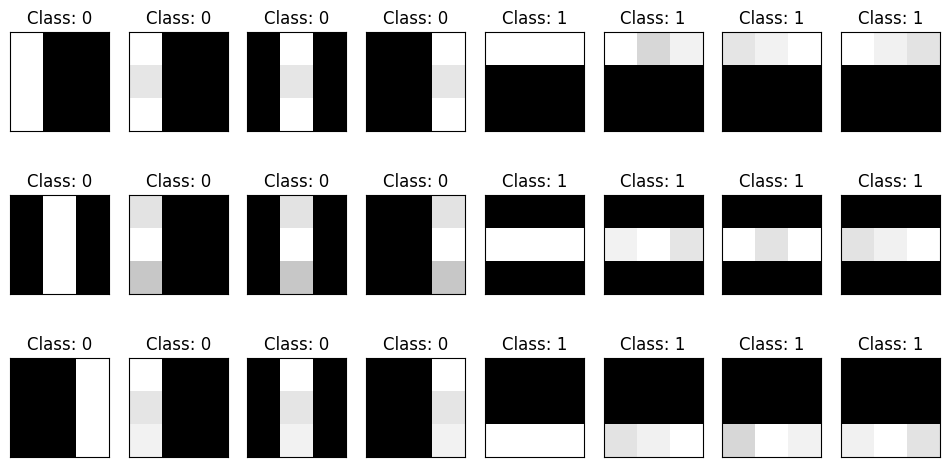

In [114]:
fig, axs = plt.subplots(3, 8, figsize=(12, 6))

iexmp = 0
for icol in range(0,8):
    for irow in range(0,3):
        axs[irow, icol].imshow(x0[:,iexmp].reshape((3, 3)).T, cmap='gray')
        axs[irow, icol].set(title=f"Class: {y[iexmp]}", xticks=[], yticks=[])
        iexmp += 1

The input matrix $x^{[0]}$:

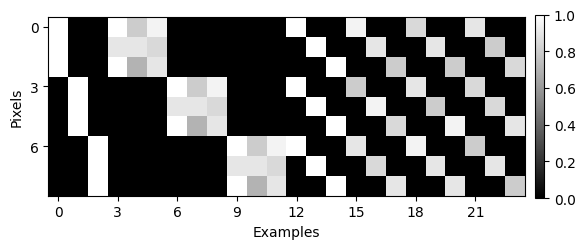

In [115]:
plt.imshow(x0, cmap='gray', vmin=0, vmax=1)
plt.xticks(ticks=np.arange(0, x0.shape[1], 3))
plt.yticks(ticks=np.arange(0, x0.shape[0], 3))
plt.colorbar(fraction=0.0185, pad=0.02)
plt.xlabel("Examples")
plt.ylabel("Pixels")
plt.show()

The output vector of labels:

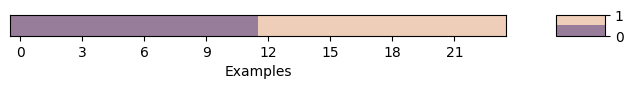

In [116]:
im = plt.imshow(y.reshape(1, -1), cmap=cmap_cl, vmin=0, vmax=1)
plt.xticks(ticks=np.arange(0, y.shape[0], 3))
plt.yticks([], [])
plt.xlabel("Examples")
add_colorbar(im)

plt.show()

# PCA

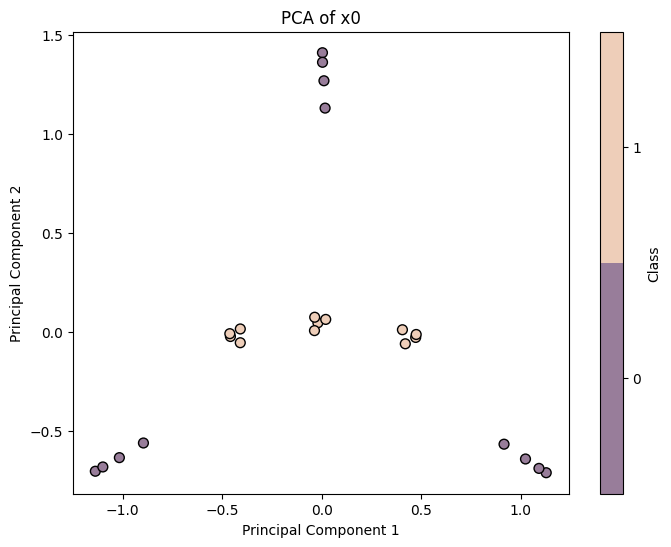

In [117]:
# Perform PCA analysis on x0
from sklearn.decomposition import PCA

# Initialize PCA to reduce to 2 components
pca = PCA(n_components=2)

# Fit and transform the data
x0_pca = pca.fit_transform(x0.T)  # Transpose x0 to have examples as rows

# Plot the first two components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x0_pca[:, 0], x0_pca[:, 1], c=y, cmap=cmap_cl, edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of x0')
plt.colorbar(label='Class', ticks=[0.25, .75], format=mticker.FixedFormatter(['0', '1']))
plt.show()


# Logistic regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the logistic regression model
logistic_reg = LogisticRegression()

# Fit the model to the data
logistic_reg.fit(x0.T, y)

# Predict the response variable using the logistic regression model
y_pred_logistic = logistic_reg.predict(x0.T)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_logistic)
print("Accuracy:", accuracy)

# Display the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_logistic)
print("Confusion Matrix:\n", conf_matrix)

print("\nCoefficients:", logistic_reg.coef_)
print("Intercept:", logistic_reg.intercept_)

Accuracy: 0.5416666666666666
Confusion Matrix:
 [[5 7]
 [4 8]]

Coefficients: [[ 0.00859953 -0.02227466 -0.07894518 -0.07964388 -0.03308696  0.03514127
  -0.03514359 -0.01482976 -0.02147757]]
Intercept: [0.07273588]


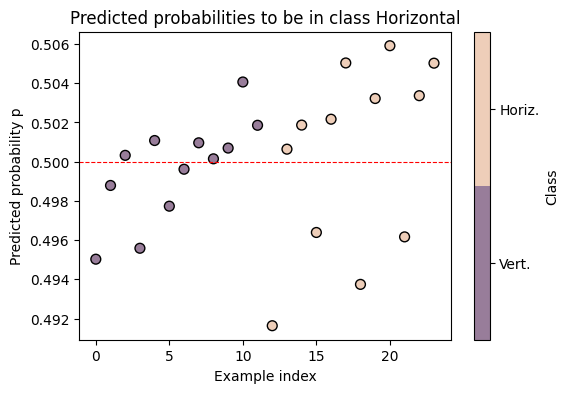

In [143]:
# Plot the response variable for fitted parameters in logistic_reg for all predictors in x0

# Calculate the predicted probabilities
y_prob_logistic = logistic_reg.predict_proba(x0.T)[:, 1]

# Plot the predicted probabilities
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_prob_logistic)), y_prob_logistic, c=y, cmap=cmap_cl, edgecolor='k', s=50)
plt.xlabel('Example index')
plt.ylabel('Predicted probability p')
plt.title('Predicted probabilities to be in class Horizontal')
plt.axhline(0.5, color='red', linewidth=0.8, linestyle='--')
plt.colorbar(label='Class', ticks=[0.25, .75], format=mticker.FixedFormatter(['Vert.', 'Horiz.']))
plt.show()


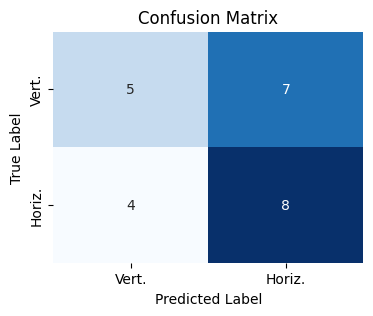

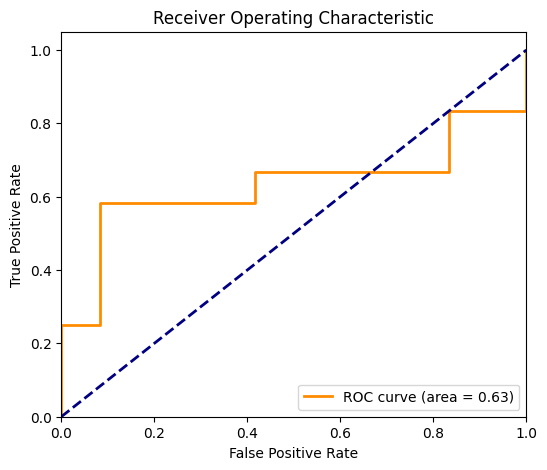

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Vert.', 'Horiz.'])
plt.yticks(ticks=[0.5,1.5],labels=['Vert.', 'Horiz.'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC curve
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y, logistic_reg.predict_proba(x0.T)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [121]:
# Add an index column to df_train
dt_train = dt_train.reset_index().rename(columns={'index': 'id'})
dt_train.head()


,id,1_1,1_2,1_3,2_1,2_2,2_3,3_1,3_2,3_3,class
0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
3,3,1.0,0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.8,0.9,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0


In [123]:
# Assuming df_train is a DataFrame that needs to be converted to long format
dt_train_long = dt_train.melt(id_vars=['id','class'], var_name='pixel', value_name='pixel_val')

# Convert the 'class' column in df_train_long to a categorical type
dt_train_long['class'] = dt_train_long['class'].astype('category')

# Display the first few rows of the long format DataFrame
print(dt_train_long.head())


   id class pixel  pixel_val
0   0     0   1_1        1.0
1   1     0   1_1        0.0
2   2     0   1_1        0.0
3   3     0   1_1        1.0
4   4     0   1_1        0.8


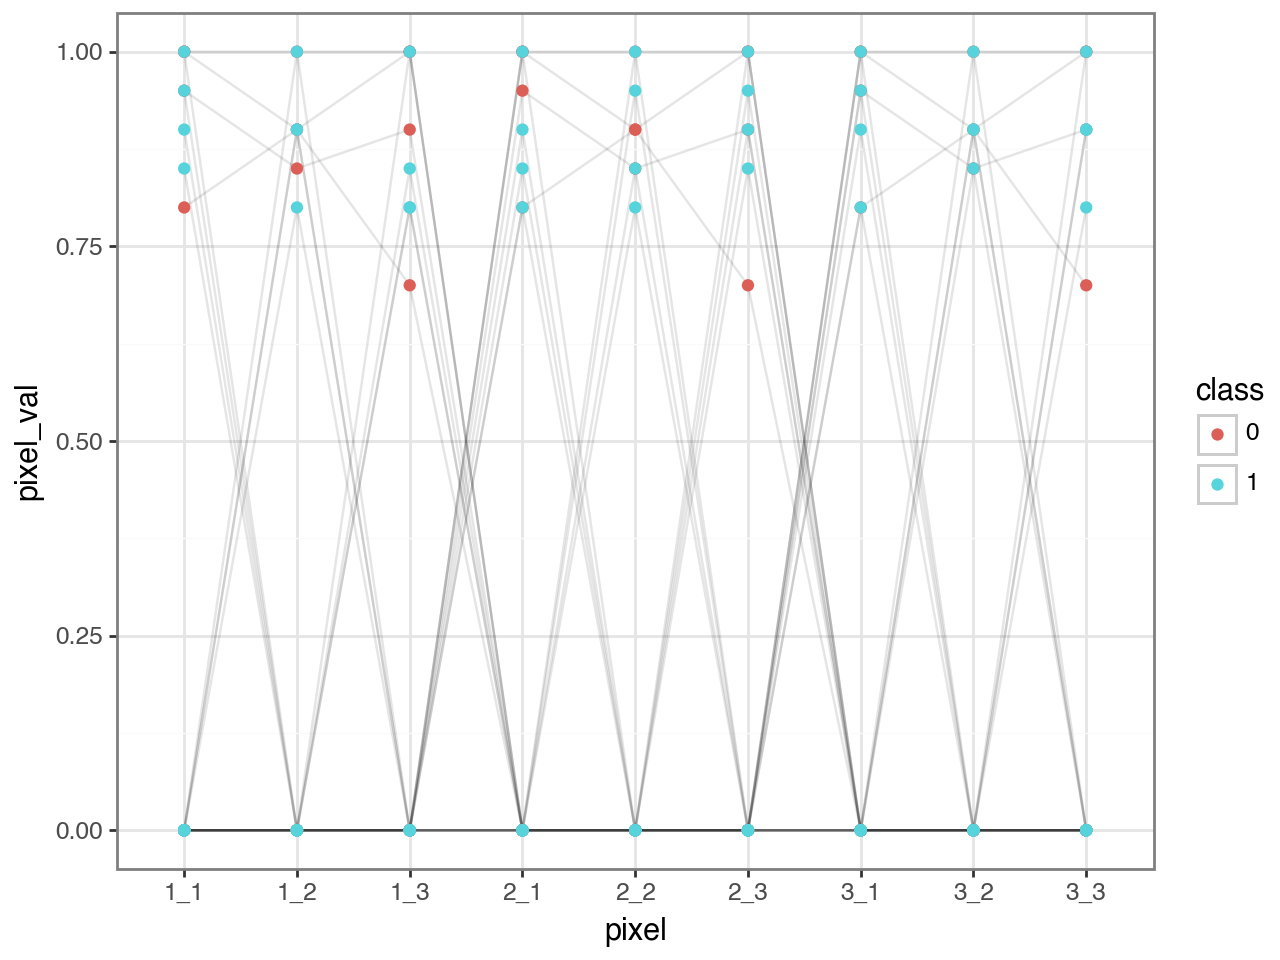

In [130]:
(p9.ggplot(dt_train_long,
          p9.aes(x = 'pixel',
                 y = 'pixel_val',
                 group = 'id'))
+ p9.geom_line(alpha = 0.1)
+ p9.geom_point(p9.aes(color = "class"))
+ p9.theme_bw())

In [132]:
6*9 + 6 + 2*6 + 2

74

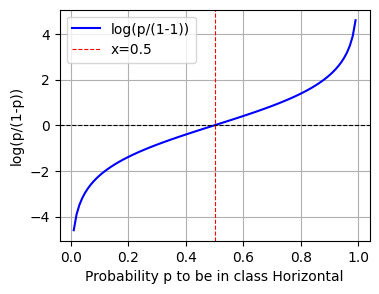

In [138]:
# Define the function to plot
def logit(x):
    return np.log(x / (1 - x))

# Generate x values from 0 to 1, avoiding the endpoints to prevent division by zero
x_values = np.linspace(0.01, 0.99, 100)

# Calculate the corresponding y values
y_values = logit(x_values)

# Plot the function
plt.figure(figsize=(4, 3))
plt.plot(x_values, y_values, label='log(p/(1-1))', color='blue')
plt.xlabel('Probability p to be in class Horizontal')
plt.ylabel('log(p/(1-p))')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0.5, color='red', linewidth=0.8, linestyle='--', label='x=0.5')
plt.legend()
plt.show()
